<a href="https://colab.research.google.com/github/bajajdev/anudip-project/blob/main/Copy_of_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv("/content/drive/MyDrive/student-performance-prediction/data/studentdata2.csv")

# Preview first rows
print(df.head())

# Check column names
print("\nColumn names:")
print(df.columns.tolist())


  Student_ID  Age     Sex School Type Scholarship Extra Cerricular  \
0   STUDENT1   21    Male       Other         50%              Yes   
1   STUDENT2   21    Male       Other         50%              Yes   
2   STUDENT3   21    Male       State         50%               No   
3   STUDENT4   18  Female     Private         50%              Yes   
4   STUDENT5   21    Male     Private         50%               No   

  Sports_activity  Study Hours Attendance Reading Notes Attentiveness  \
0              No           10     Always     Yes   Yes            No   
1              No           12     Always     Yes    No           Yes   
2              No           11      Never      No    No            No   
3              No            9     Always      No   Yes            No   
4              No           12     Always     Yes    No           Yes   

  Project_work Grade  Final Percentage Pass_Status  
0           No    AA                90        Pass  
1          Yes    AA              

In [19]:
# Shape of the data
print("Shape:", df.shape)

# Data info
df.info()

# Column names
print("\nColumns:", df.columns.tolist())


Shape: (200, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student_ID        200 non-null    object
 1   Age               200 non-null    int64 
 2   Sex               200 non-null    object
 3   School Type       200 non-null    object
 4   Scholarship       200 non-null    object
 5   Extra Cerricular  200 non-null    object
 6   Sports_activity   200 non-null    object
 7   Study Hours       200 non-null    int64 
 8   Attendance        200 non-null    object
 9   Reading           200 non-null    object
 10  Notes             200 non-null    object
 11  Attentiveness     200 non-null    object
 12  Project_work      200 non-null    object
 13  Grade             200 non-null    object
 14  Final Percentage  200 non-null    int64 
 15  Pass_Status       200 non-null    object
dtypes: int64(3), object(13)
memory usage: 25.1+ K

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


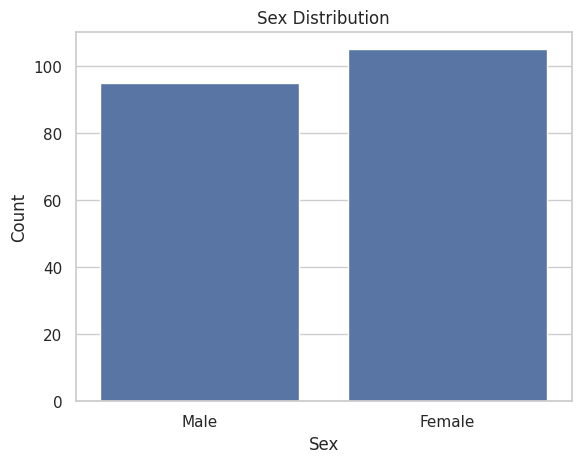

In [22]:
sns.countplot(x='Sex', data=df)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


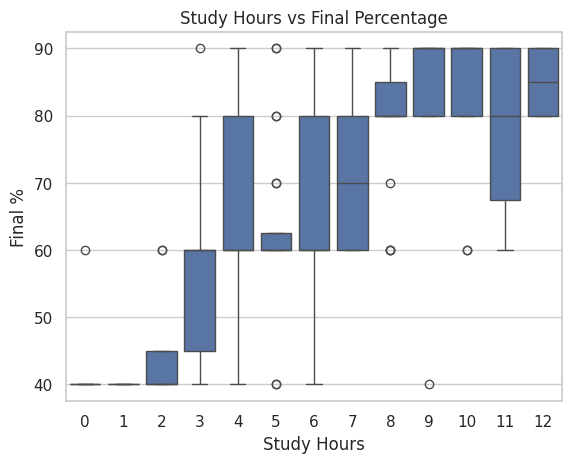

In [26]:
sns.boxplot(x='Study Hours', y='Final Percentage', data=df)
plt.title("Study Hours vs Final Percentage")
plt.xlabel("Study Hours")
plt.ylabel("Final %")
plt.show()


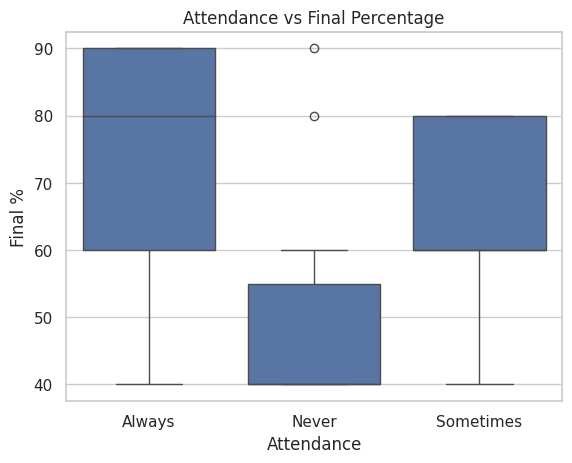

In [27]:
sns.boxplot(x='Attendance', y='Final Percentage', data=df)
plt.title("Attendance vs Final Percentage")
plt.xlabel("Attendance")
plt.ylabel("Final %")
plt.show()


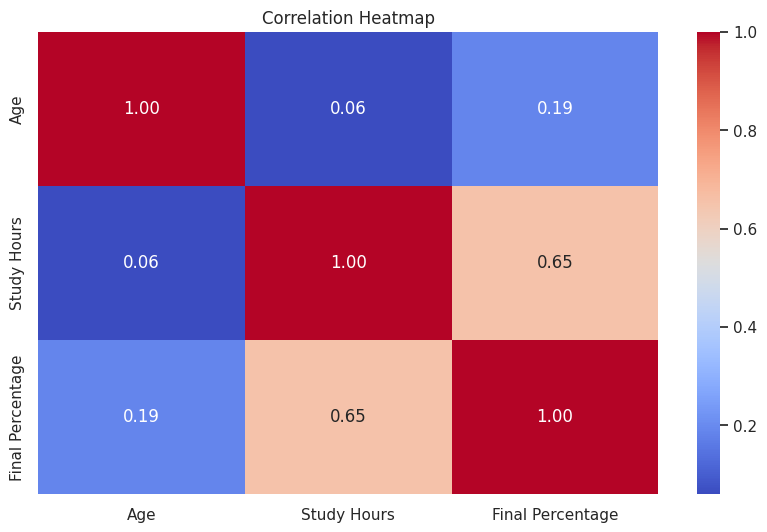

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder

data = df.copy()

# Encode all object (categorical) columns
label_cols = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Drop rows with missing values
data.dropna(inplace=True)

data.head()


,Student_ID,Age,Sex,School Type,Scholarship,Extra Cerricular,Sports_activity,Study Hours,Attendance,Reading,Notes,Attentiveness,Project_work,Grade,Final Percentage,Pass_Status
0,0,21,1,0,1,1,0,10,0,1,1,0,0,0,90,1
1,111,21,1,0,1,1,0,12,0,1,0,1,1,0,90,1
2,123,21,1,2,1,0,0,11,1,0,0,0,1,0,90,1
3,134,18,0,1,1,1,0,9,0,0,1,0,0,0,90,1
4,145,21,1,1,1,0,0,12,0,1,0,1,1,0,90,1


In [31]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('Final Percentage', axis=1)
y = data['Final Percentage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1.489621824546941e-26
R² Score: 1.0


In [33]:
import joblib

joblib.dump(model, '/content/student_model.pkl')
print("Model saved as student_model.pkl")


Model saved as student_model.pkl


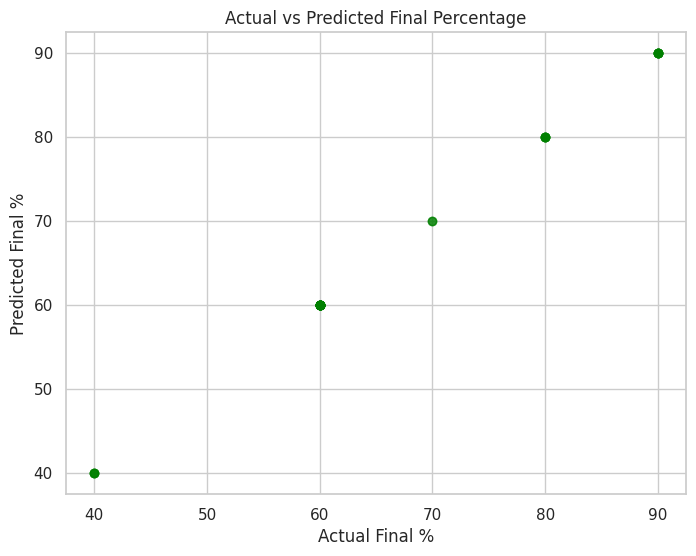

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel("Actual Final %")
plt.ylabel("Predicted Final %")
plt.title("Actual vs Predicted Final Percentage")
plt.grid(True)
plt.savefig('/content/student_performance_plot.png')
plt.show()
